## EJERCICIO 1.5

Se obtuvieron datos históricos del mercado inmobiliario de una ciudad de Nueva Taipei, en Taiwan. La base es inmobiliaria.xlsx.
Las características son:

* **edad**: Edad de la propiedad (en años).
* **distancia**: La distancia a la estación de transporte más cercana (en metros).
* **negocios**: Cantidad de negocios de conveniencia en las cercanías a una distancia realizable a pie
* **latitud**: Latitud de la ubicación de la propiedad (en grados).
* **longitud**: Longitud de la ubicación de la propiedad (en grados).
* **precio**: Precio por metro cuadrado (en miles de dólares)

Se quiere investigar si el precio de las propiedades puede ser estimado en función de alguna de las variables disponibles.

In [2]:
library(readxl)
library(ggplot2)
library(dplyr)
library(MVN)
library(corrplot)
library(aod)
library(lmtest)
library(car)
library(MASS)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [3]:
PARAM <- list()
PARAM$HOME <- "C://Austral/mcd-reg-adv/datasets/"
PARAM$FILE <- "inmobiliaria.csv"
file_name <- paste0(PARAM$HOME,PARAM$FILE)

In [5]:
inmob <- read.csv(file_name, sep = ";")
head(inmob)

,edad,distancia,negocios,latitud,longitud,precio
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,32.0,84.87882,10,24.98,121.54,11.5
2,19.5,306.59470,9,24.98,121.54,12.8
3,13.3,561.98450,5,24.99,121.54,14.3
4,13.3,561.98450,5,24.99,121.54,16.6
5,5.0,390.56840,5,24.98,121.54,13.1
6,7.1,2176.03000,4,24.96,121.51,9.7


### a) Analizar si el precio depende de alguna de las variables.

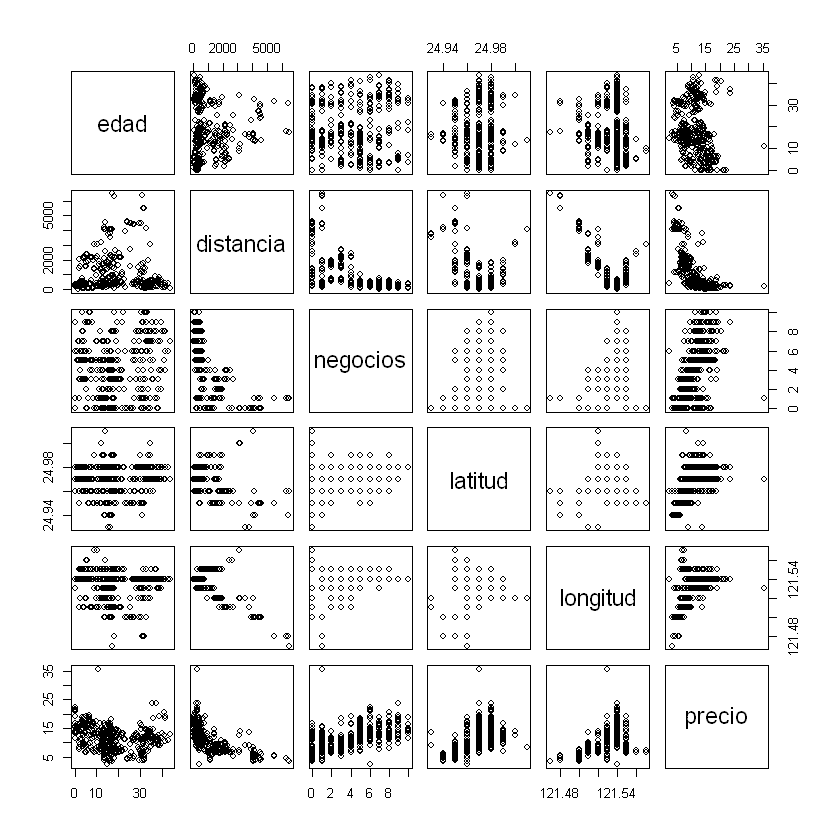

In [6]:
plot(inmob)

In [7]:
inmob_cor <- cor( inmob )
inmob_cor

,edad,distancia,negocios,latitud,longitud,precio
edad,1.00000000,0.02437791,0.05706979,0.05980355,-0.03524672,-0.2125314
distancia,0.02437791,1.00000000,-0.60287572,-0.59657003,-0.78881829,-0.6721856
negocios,0.05706979,-0.60287572,1.00000000,0.45521395,0.42415810,0.5719662
latitud,0.05980355,-0.59657003,0.45521395,1.00000000,0.39939169,0.5574765
longitud,-0.03524672,-0.78881829,0.42415810,0.39939169,1.00000000,0.4993649
precio,-0.21253136,-0.67218561,0.57196622,0.55747645,0.49936486,1.0000000


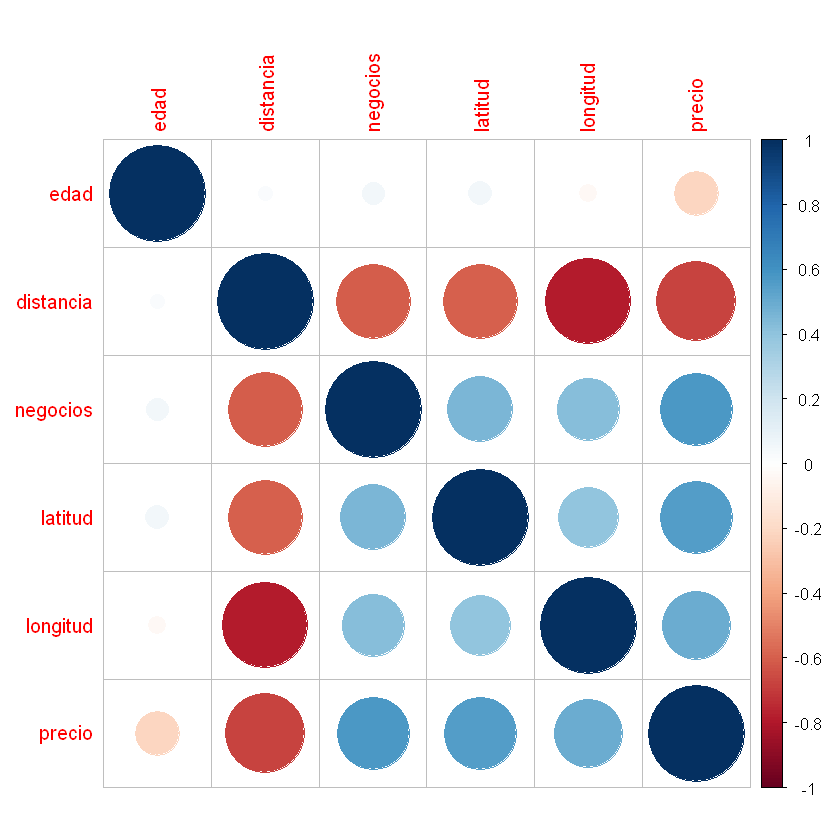

In [14]:
corrplot( inmob_cor, method = "circle" )

No existe evidencia suficiente para afirmar que el precio dependa fuertemente de alguna de las variables. La correlación es baja.

### b) Estudiar la linealidad de la relación precio-distancia.

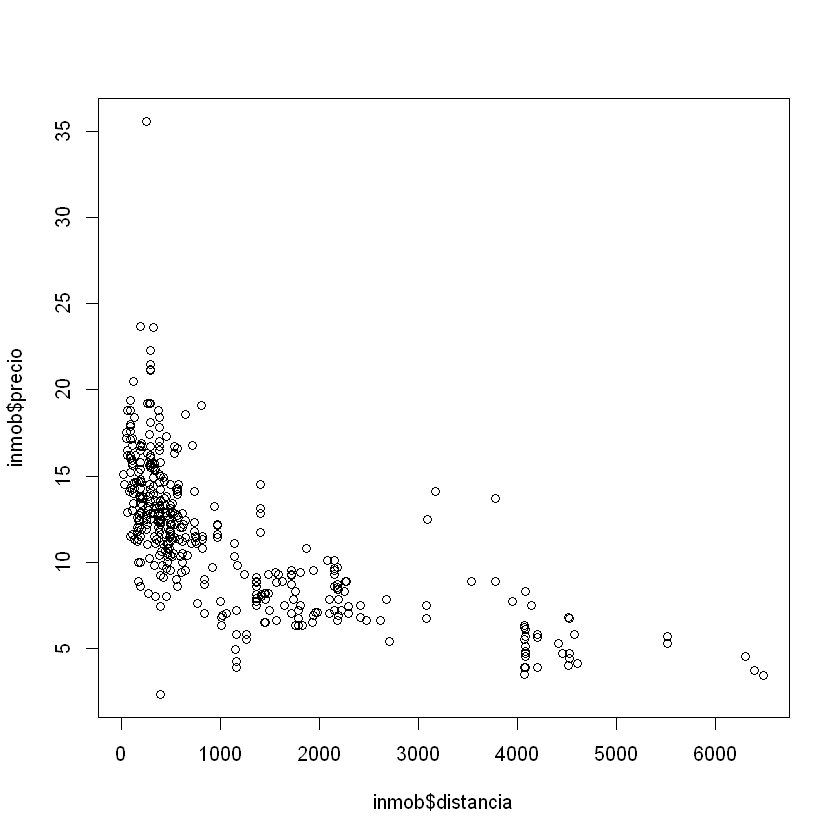

In [15]:
plot( inmob$distancia, inmob$precio )

In [10]:
inmob_mod1 <- lm ( precio ~ distancia, data = inmob )
summary( inmob_mod1 )


Call:
lm(formula = precio ~ distancia, data = inmob)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7154  -1.8492  -0.3407   1.4570  22.2765 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.8766423  0.1992948   69.63   <2e-16 ***
distancia   -0.0021901  0.0001196  -18.32   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.059 on 407 degrees of freedom
Multiple R-squared:  0.4518,	Adjusted R-squared:  0.4505 
F-statistic: 335.5 on 1 and 407 DF,  p-value: < 2.2e-16


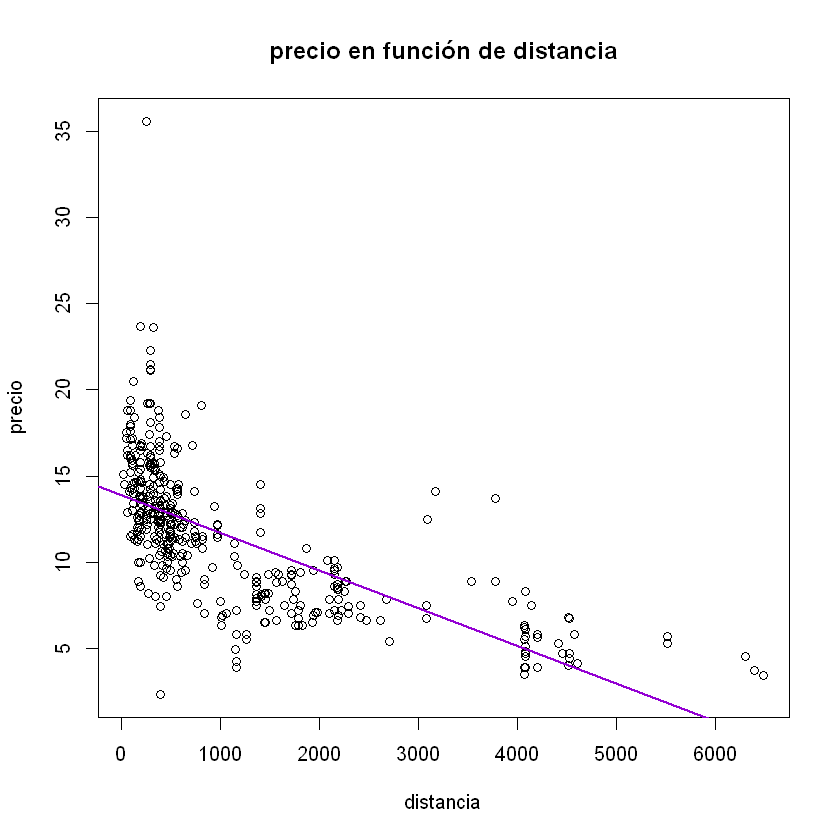

In [11]:
plot( inmob$distancia, inmob$precio, 
    xlab = "distancia", 
    ylab ="precio", 
    main = "precio en función de distancia" )
abline( inmob_mod1, 
    col = "darkviolet", 
    lwd = 2 )

### c) Estimar los coeficientes del modelo y realizar el análisis diagnóstico de los residuos del mismo. Utilizar para este análisis los gráficos de residuos versus valores ajustados, el qq-plot de los residuos, la grafica de residuos versus leverage.

In [16]:
inmob_mod_multi <- lm ( precio ~ edad + distancia + negocios + latitud + longitud, data = inmob )
summary( inmob_mod_multi )


Call:
lm(formula = precio ~ edad + distancia + negocios + latitud + 
    longitud, data = inmob)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3298  -1.5920  -0.4215   1.2047  23.4457 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.390e+03  1.799e+03  -0.772    0.440    
edad        -8.384e-02  1.183e-02  -7.090 6.05e-12 ***
distancia   -1.263e-03  2.152e-04  -5.868 9.21e-09 ***
negocios     3.528e-01  5.788e-02   6.095 2.56e-09 ***
latitud      7.390e+01  1.325e+01   5.578 4.46e-08 ***
longitud    -3.641e+00  1.420e+01  -0.256    0.798    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.704 on 403 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5706 
F-statistic: 109.4 on 5 and 403 DF,  p-value: < 2.2e-16


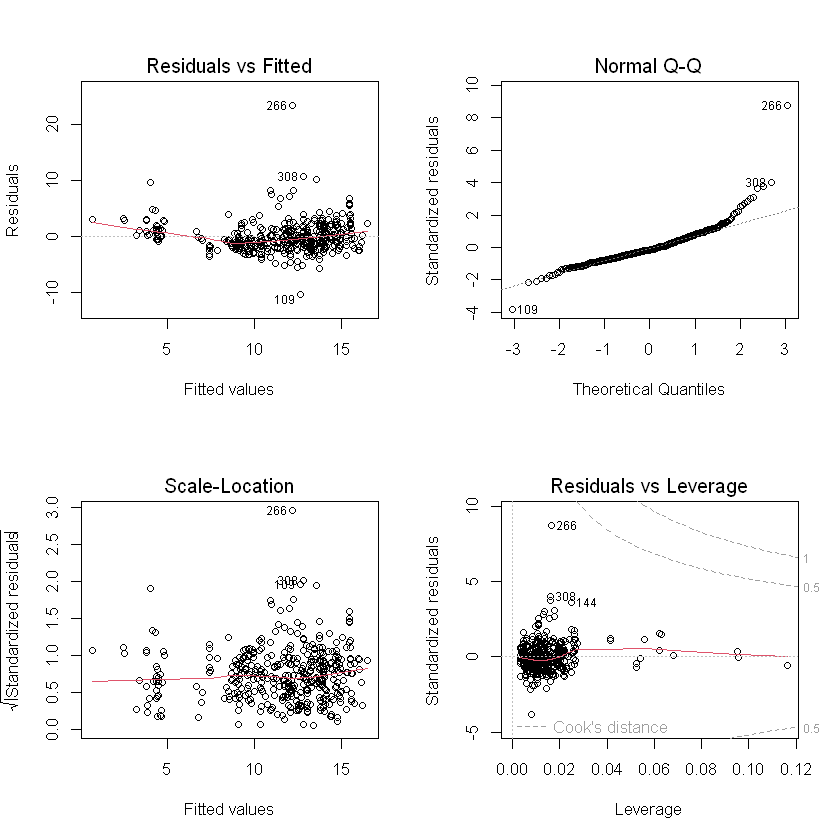

In [20]:
par( mfrow = c(2,2) )
plot( inmob_mod_multi )

### d) Aplicar los test de Durbin-Watson Breush-Pagan

In [17]:
shapiro.test( inmob_mod_multi$residuals )


	Shapiro-Wilk normality test

data:  inmob_mod_multi$residuals
W = 0.86327, p-value < 2.2e-16


Rechazo hipótesis nula H0 de normalidad de los residuos.

In [18]:
bptest( inmob_mod_multi )


	studentized Breusch-Pagan test

data:  inmob_mod_multi
BP = 4.9583, df = 5, p-value = 0.421


No rechazamos H0 de homocedasticidad.

In [19]:
dwt( inmob_mod_multi )

 lag Autocorrelation D-W Statistic p-value
   1     -0.08784271       2.16755   0.048
 Alternative hypothesis: rho != 0

No rechazamos H0 de no autocorrelación

### e) Analice la presencia de outlier y verifique si coinciden con los puntos influyentes.

In [20]:
outlierTest( inmob_mod_multi )

     rstudent unadjusted p-value Bonferroni p
266  9.701473         3.9155e-20   1.6014e-17
308  4.107380         4.8504e-05   1.9838e-02
109 -3.902801         1.1147e-04   4.5589e-02

In [21]:
summary( influence.measures( model = inmob_mod_multi) )

Potentially influential observations of
	 lm(formula = precio ~ edad + distancia + negocios + latitud +      longitud, data = inmob) :

    dfb.1_ dfb.edad dfb.dstn dfb.ngcs dfb.lttd dfb.lngt dffit   cov.r   cook.d
31   0.10   0.02    -0.14     0.02    -0.18    -0.07    -0.20    1.14_*  0.01 
43  -0.07   0.23     0.00    -0.14     0.12     0.05     0.33    0.91_*  0.02 
101 -0.02  -0.18     0.02     0.04     0.08     0.01     0.24    0.95_*  0.01 
109 -0.06   0.03     0.11    -0.12     0.25     0.01    -0.35    0.82_*  0.02 
112  0.00   0.05     0.16     0.10     0.00     0.00     0.28    1.05_*  0.01 
122  0.05   0.27    -0.05    -0.08     0.12    -0.07     0.36    0.89_*  0.02 
124  0.05   0.27    -0.10     0.02    -0.09    -0.03     0.33    0.93_*  0.02 
144  0.06   0.00     0.07     0.04    -0.39     0.01     0.59_*  0.85_*  0.06 
162 -0.02  -0.21     0.02     0.05     0.09     0.01     0.27    0.93_*  0.01 
180  0.03   0.00    -0.02     0.00     0.00    -0.03    -0.03    1.07_*  0

In [23]:
which( dfbetas( inmob_mod_multi )[,2]>1 )

named integer(0)

In [24]:
which( hatvalues( inmob_mod_multi ) >0.05 )


31 112 180 183 224 245 303 340 343 355 403 
 31 112 180 183 224 245 303 340 343 355 403

In [25]:
n <- length( inmob$precio )
p <- length( inmob_mod_multi$coefficients )
which( hatvalues( inmob_mod_multi ) > 2 * p / n )

9  31 112 180 183 224 245 251 303 340 343 355 403 
  9  31 112 180 183 224 245 251 303 340 343 355 403

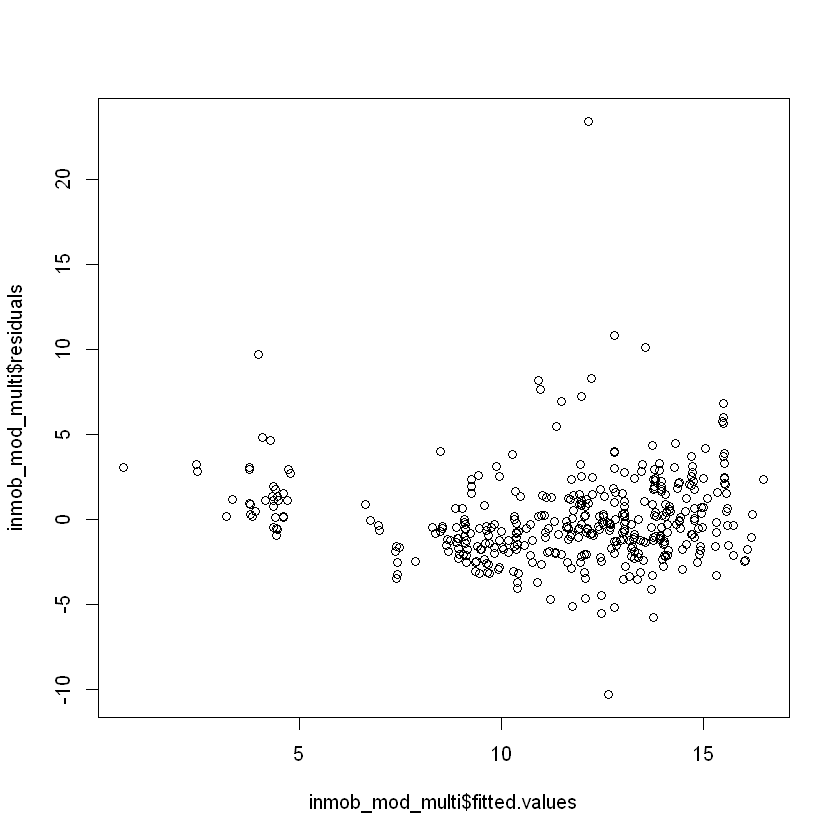

In [26]:
plot( inmob_mod_multi$fitted.values, inmob_mod_multi$residuals )

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
31,-0.55087624,0.11626348,6.665437e-03
144,3.69240923,0.02500286,5.650005e-02
183,-0.02668326,0.09569788,1.258906e-05
266,9.70147275,0.01644799,2.130881e-01
308,4.10738044,0.01598336,4.394094e-02


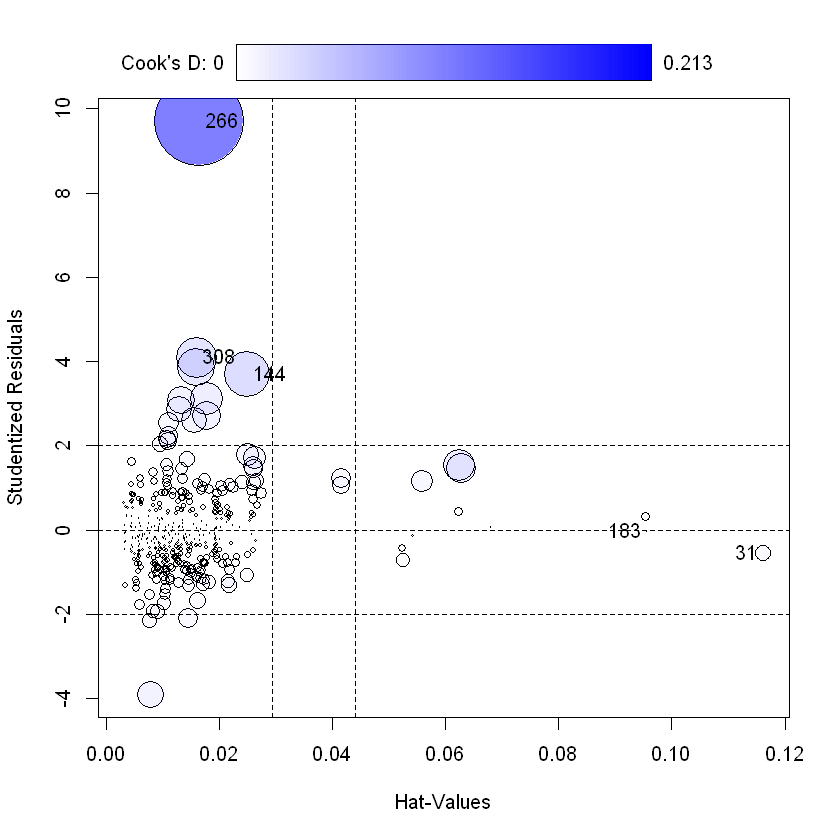

In [23]:
influencePlot( model = inmob_mod_multi )

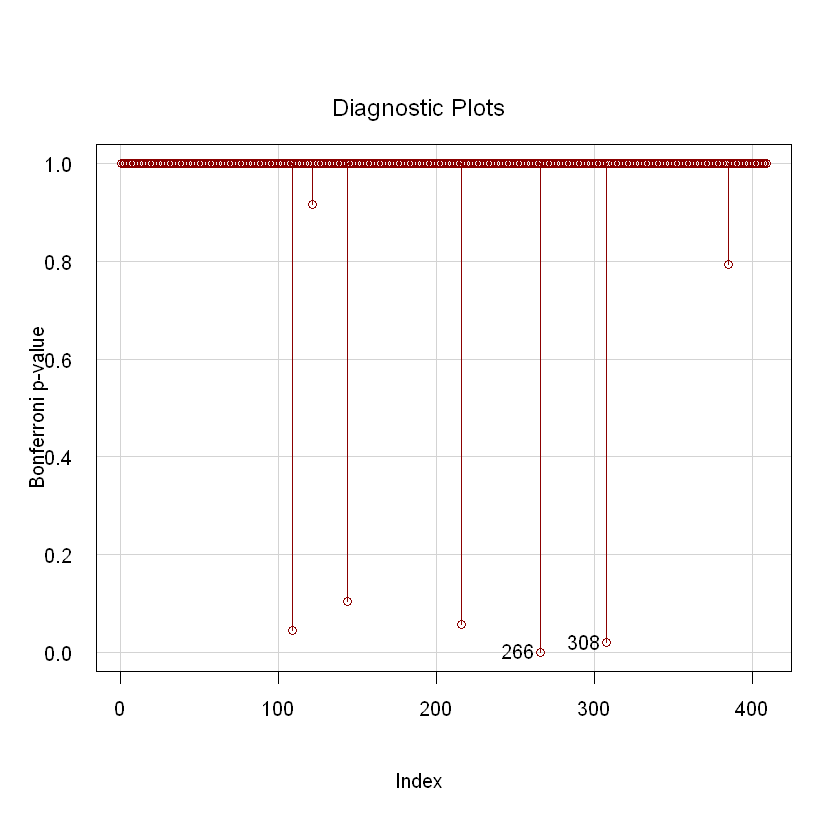

In [24]:
influenceIndexPlot( inmob_mod_multi, 
                    vars = "Bonf", 
                    las = 1, 
                    col = "darkred" )